In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
DS=pd.read_csv("G:\\My Drive\\DATA SC\\EDA\\Project 1 for EDA\\Diwali sales.csv", encoding="latin")


In [3]:
DS.shape
print("No. of Rows   : ",DS.shape[0])
print("No. of Columns: ",DS.shape[1])

No. of Rows   :  11251
No. of Columns:  13


In [4]:
DS.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [5]:
DS


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [6]:
# Droping the User_ID variable as it is of no use in our Insights
DS.drop(columns=["User_ID"],inplace=True)

In [7]:
DS.info()   # Check for the Missing values if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cust_name         11251 non-null  object 
 1   Product_ID        11251 non-null  object 
 2   Gender            11251 non-null  object 
 3   Age Group         11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 1.0+ MB


### <span style="color:red" >NOTE : Variable Amount has 12 Missing values.  </span>.



In [8]:
# imputing Missing vlaues in Amount column by its Median
amt_mean=DS["Amount"].median()
DS["Amount"].fillna(amt_mean, inplace=True)

In [9]:
DS.nunique()       # TO get the Unique Values in  Every Columns

Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
dtype: int64

In [10]:
DS.describe().T  # To Get the Statistical Summary of the continous Variables

,count,mean,std,min,25%,50%,75%,max
Age,11251.0,35.421207,12.754122,12.0,27.0,33.0,43.0,92.0
Marital_Status,11251.0,0.420318,0.493632,0.0,0.0,0.0,1.0,1.0
Orders,11251.0,2.489290,1.115047,1.0,1.5,2.0,3.0,4.0
Amount,11251.0,9452.176734,5219.754408,188.0,5443.5,8109.0,12671.0,23952.0


In [11]:
DS.isna().sum()  # To recheck if all null values are Filled aur droped successfully

Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

## ANALYSIS

In [12]:
DS["Gender"].value_counts()

F    7842
M    3409
Name: Gender, dtype: int64

#### Observation : Female count=70% whereas Male count=30%

In [13]:
DS["Age Group"].value_counts()

26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: Age Group, dtype: int64

In [14]:
DS["Marital_Status"].value_counts()
# 0=Unmarried
# 1=Married

0    6522
1    4729
Name: Marital_Status, dtype: int64

## Visualization

#### 1. Gender Vs Order/Amount

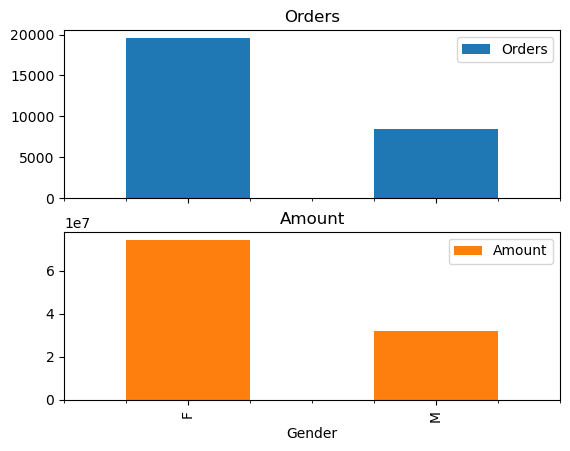

In [15]:
df1=DS.groupby("Gender")[["Orders", "Amount"]].sum()
df1.plot(kind="bar",subplots=True)
plt.show()



### <span style="color:green" >OBSERVATION : Female Buyers were more than male buyers in Diwali Sales.  </span>.



### 2. Age Group Vs Orders/Amount

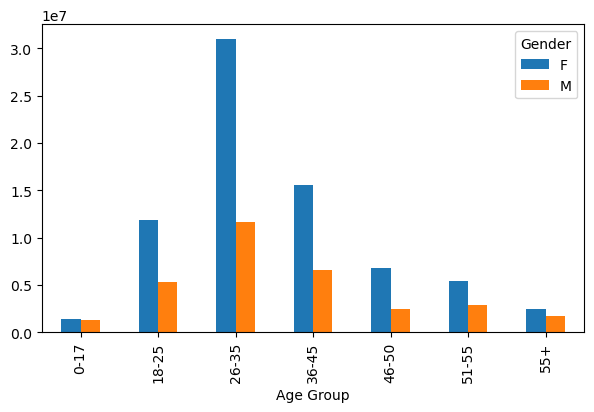

In [28]:
df2 = DS.groupby(['Age Group', 'Gender'])['Amount'].sum().reset_index()
#print(df2)
df2.pivot(index='Age Group', columns='Gender', values='Amount').plot(kind="bar",figsize=(7,4))
plt.show()



### <span style="color:green" >Observation : Female from age group 26-45yrs had more buyers and placed more orders than Male of same age Group.  </span>.



### 3. Marital Status Vs Orders/Amount

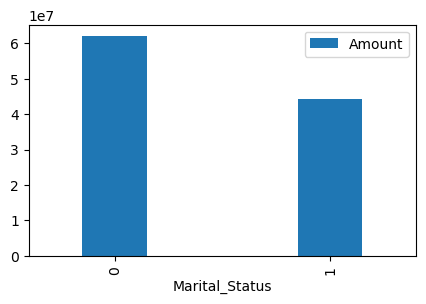

In [17]:
DS.groupby("Marital_Status")[["Amount"]].sum().plot(kind="bar" ,width=0.3,figsize=(5,3))
plt.show()
# Where 0= Unamarried & 1 =Married


### <span style="color:green" >OBSERVATION : Unmarried Personel had more number of Orders then Married.  </span>.



array([<Axes: xlabel='Zone'>, <Axes: xlabel='Zone'>], dtype=object)

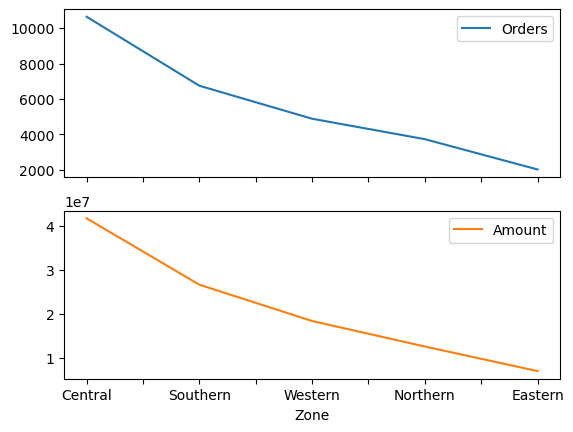

In [18]:
DS.groupby("Zone")[["Orders", "Amount"]].sum().sort_values(by="Amount", ascending=False).plot(subplots=True)


### <span style="color:green" >OBSERVATION :Trend shows Central zone has most number of Orders while Eastern have the  Lowest  </span>.




##  <span style="color:green" >ZONE WISE ANALYSIS.  </span>.

## 1.CENTRAL ZONE 

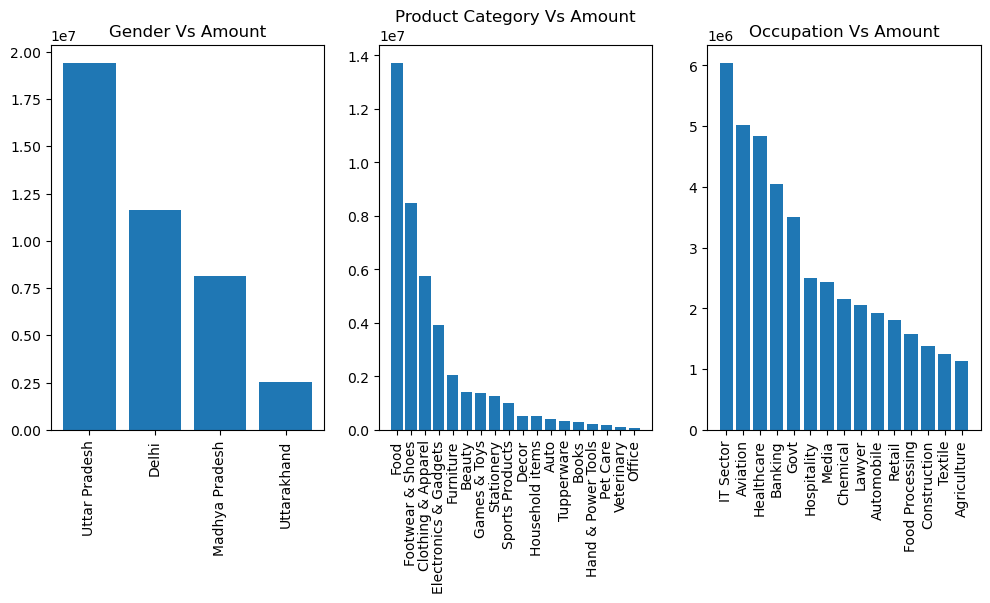

In [19]:
ZC=DS[DS["Zone"]=="Central"]  # created a new Data Frame Filters with Zone having subcategory as CENTRAL
x1=ZC.groupby("State")["Amount"].sum().sort_values(ascending=False)
x2=ZC.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False)
x3=ZC.groupby("Occupation")["Amount"].sum().sort_values(ascending=False)

fig, ax=plt.subplots(1,3, figsize=(12,5))
ax[0].bar(x1.index,x1.values)
ax[0].set_title("Gender Vs Amount")
ax[0].set_xticklabels(x1.index, rotation=90)

ax[1].bar(x2.index,x2.values)
ax[1].set_title("Product Category Vs Amount")
ax[1].set_xticklabels(x2.index, rotation=90)

ax[2].bar(x3.index,x3.values)
ax[2].set_title("Occupation Vs Amount")
ax[2].set_xticklabels(x3.index, rotation=90)

plt.show()

## 2.SOUTHERN ZONE 

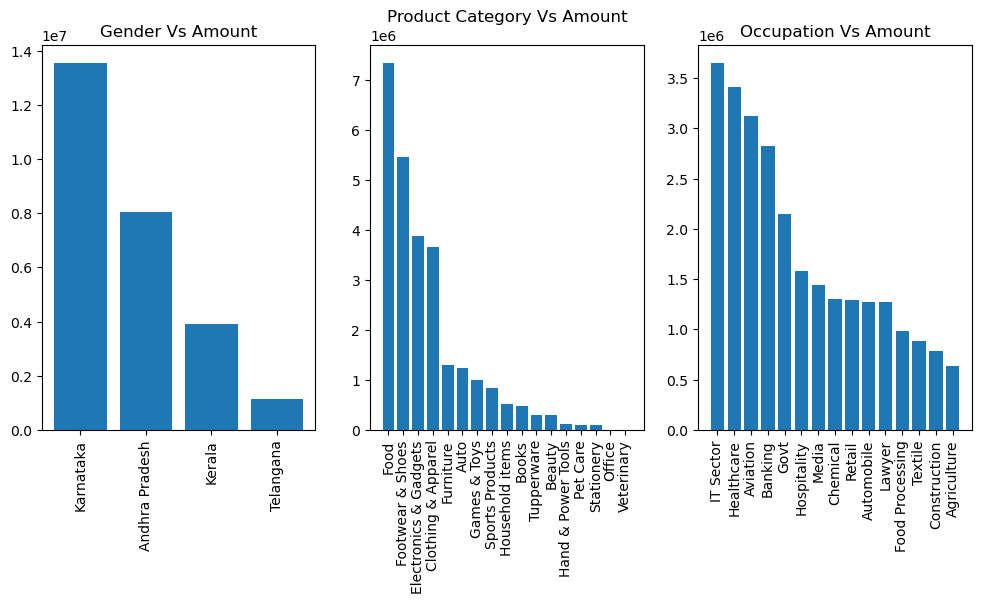

In [20]:
SZ=DS[DS["Zone"]=="Southern"]
x1=SZ.groupby("State")["Amount"].sum().sort_values(ascending=False)
x2=SZ.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False)
x3=SZ.groupby("Occupation")["Amount"].sum().sort_values(ascending=False)

fig, ax=plt.subplots(1,3, figsize=(12,5))
ax[0].bar(x1.index,x1.values)
ax[0].set_title("Gender Vs Amount")
ax[0].set_xticklabels(x1.index, rotation=90)

ax[1].bar(x2.index,x2.values)
ax[1].set_title("Product Category Vs Amount")
ax[1].set_xticklabels(x2.index, rotation=90)

ax[2].bar(x3.index,x3.values)
ax[2].set_title("Occupation Vs Amount")
ax[2].set_xticklabels(x3.index, rotation=90)
plt.show()

## 3. WESTERN ZONE

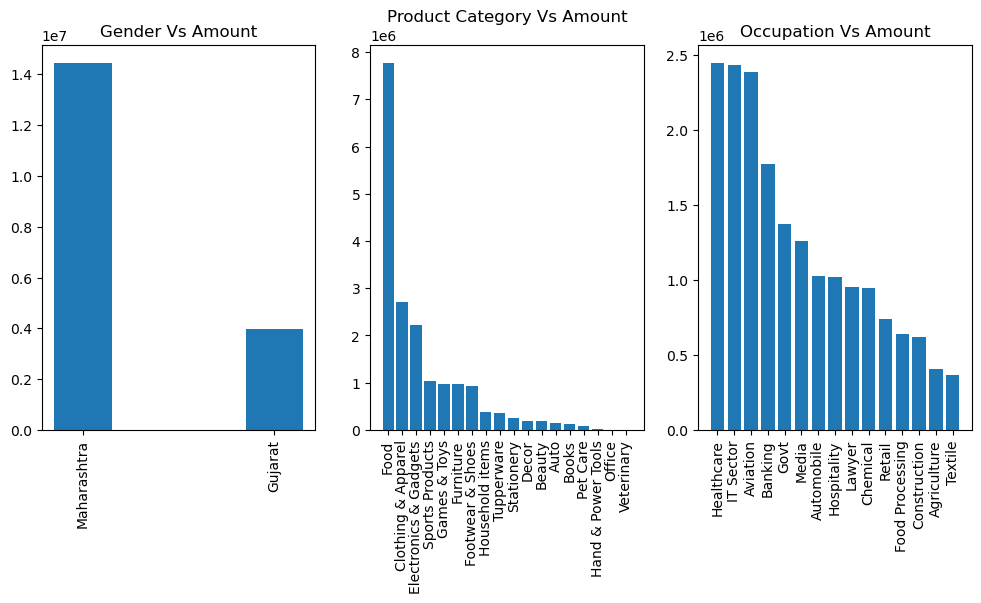

In [21]:
WZ=DS[DS["Zone"]=="Western"]
x1=WZ.groupby("State")["Amount"].sum().sort_values(ascending=False)
x2=WZ.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False)
x3=WZ.groupby("Occupation")["Amount"].sum().sort_values(ascending=False)

fig, ax=plt.subplots(1,3, figsize=(12,5))
ax[0].bar(x1.index,x1.values, width=0.3)
ax[0].set_title("Gender Vs Amount")
ax[0].set_xticklabels(x1.index, rotation=90)

ax[1].bar(x2.index,x2.values)
ax[1].set_title("Product Category Vs Amount")
ax[1].set_xticklabels(x2.index, rotation=90)

ax[2].bar(x3.index,x3.values)
ax[2].set_title("Occupation Vs Amount")
ax[2].set_xticklabels(x3.index, rotation=90)
plt.show()


### <span style="color:green" >OBSERVATION :More buyers are from Heathcare sector in western zone </span>.




## 4. NORTHERN ZONE

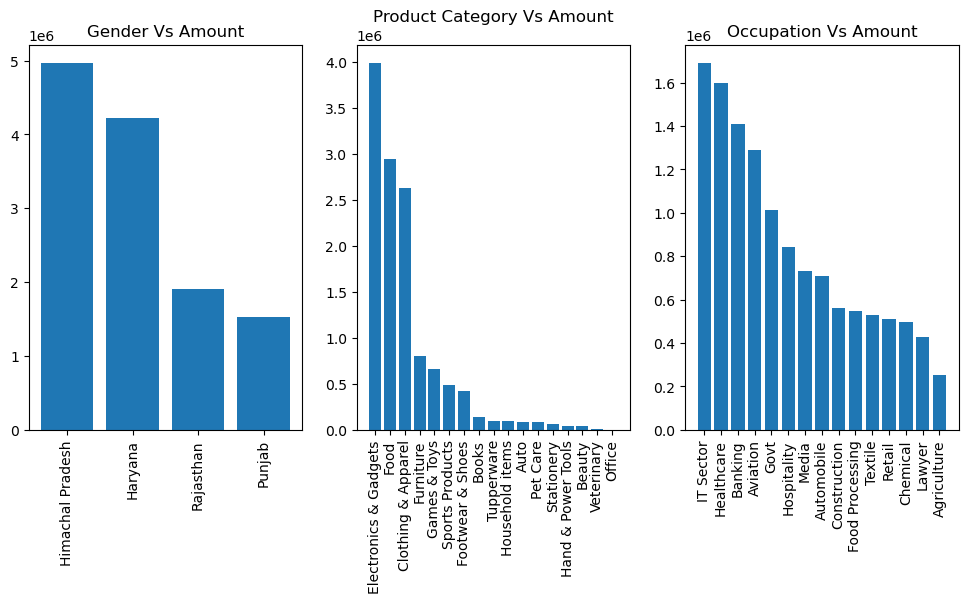

In [22]:
NZ=DS[DS["Zone"]=="Northern"]

x1=NZ.groupby("State")["Amount"].sum().sort_values(ascending=False)
x2=NZ.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False)
x3=NZ.groupby("Occupation")["Amount"].sum().sort_values(ascending=False)

fig, ax=plt.subplots(1,3, figsize=(12,5))
ax[0].bar(x1.index,x1.values)
ax[0].set_title("Gender Vs Amount")
ax[0].set_xticklabels(x1.index, rotation=90)

ax[1].bar(x2.index,x2.values)
ax[1].set_title("Product Category Vs Amount")
ax[1].set_xticklabels(x2.index, rotation=90)

ax[2].bar(x3.index,x3.values)
ax[2].set_title("Occupation Vs Amount")
ax[2].set_xticklabels(x3.index, rotation=90)
plt.show()


### <span style="color:green" >OBSERVATION :More buyers buy Electrnics& Gadgets in Product Category in Northern ZOne</span>.




## 4. EASTERN ZONE

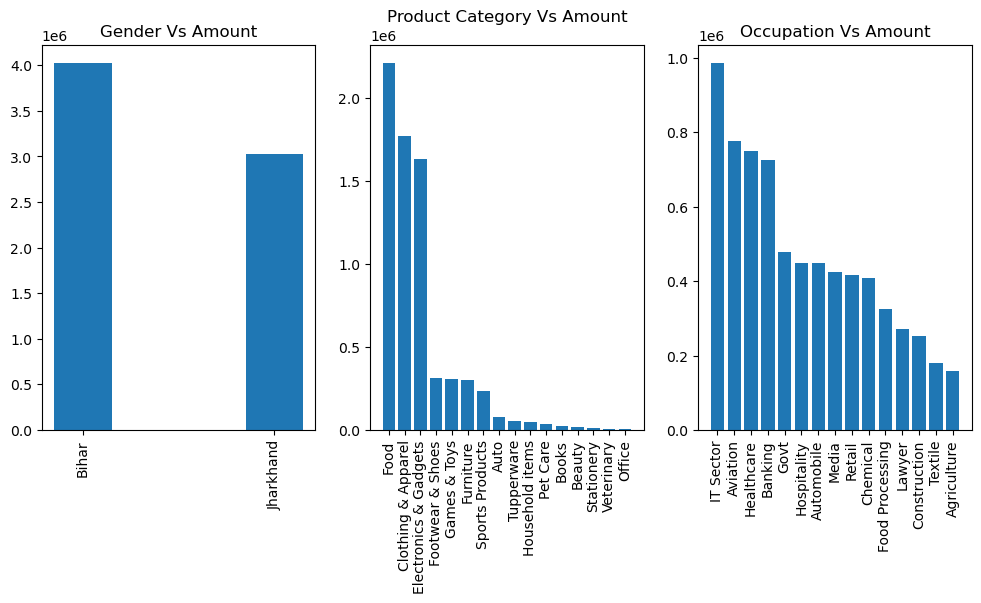

In [23]:
EZ=DS[DS["Zone"]=="Eastern"]

x1=EZ.groupby("State")["Amount"].sum().sort_values(ascending=False)
x2=EZ.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False)
x3=EZ.groupby("Occupation")["Amount"].sum().sort_values(ascending=False)

fig, ax=plt.subplots(1,3, figsize=(12,5))
ax[0].bar(x1.index,x1.values, width=0.3)
ax[0].set_title("Gender Vs Amount")
ax[0].set_xticklabels(x1.index, rotation=90)

ax[1].bar(x2.index,x2.values)
ax[1].set_title("Product Category Vs Amount")
ax[1].set_xticklabels(x2.index, rotation=90)

ax[2].bar(x3.index,x3.values)
ax[2].set_title("Occupation Vs Amount")
ax[2].set_xticklabels(x3.index, rotation=90)
plt.show()


##  <span style="color:green" >CONCLUSION.  </span>.
### 1. Female Were More involved in Shoping in all 5 Zones
### 2. Age Group between 25-45 had more number of Buyers
### 3. Unmarried Females had higher number of orders as compared to Married
### 4. Central zone has  the Highest and Eastern Zone Has the Lowest Buyers
### 5. Top 5 states with highest number of Orders
####      UP > Maharashtra > Karnatak > Delhi > MP
### 6. Top 5 Products in demands were:
####      Food > Clothing & Apprael > Electronics & Gadegts > Footwear & Shoes > Furniture
### 7. Top 5 Buyers from different Occupation were:
####      IT Sector > Healthcare> Aviation >Banking > Govt


##  <span style="color:green" >SUGGESTIONS.  </span>.

### 1. Discount on Product Category as per ZONES should be done  to attract the buyers and increase the sales
#### Eg :- more focus should be on electronics & Gadgets in Northern Zone as compared to food in same zone